<a href="https://colab.research.google.com/github/Ayuniarfina/Final-Project-Bangkit---JKT4-B/blob/Deni-branch/basemodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Base model

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import zipfile
zipref = zipfile.ZipFile('/content/gdrive/My Drive/Data Colab/faceexp.zip')
zipref.extractall('/tmp/dataset')

In [8]:
import tensorflow as tf
import collections
import matplotlib.pyplot as plt

In [5]:
train_dir = ('/tmp/dataset/images/images/train')
test_dir = ('/tmp/dataset/images/images/validation')

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

traingenerator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    batch_size=32,
    class_mode='categorical'
)

testgenerator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48,48),
    class_mode='categorical',
    shuffle=False
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


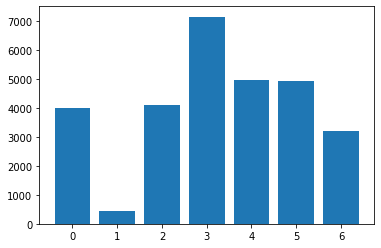

Counter({3: 7164, 4: 4982, 5: 4938, 2: 4103, 0: 3993, 6: 3205, 1: 436})


In [9]:
trainset = collections.Counter(traingenerator.classes)
plt.bar(trainset.keys(), trainset.values())
plt.show()
print(trainset)

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(48,48,3)),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(8, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation = 'relu'),
  tf.keras.layers.Dense(7, activation='softmax')
])

#model.summary()

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])
history = model.fit(traingenerator, validation_data=testgenerator, epochs=30)

Epoch 1/30
901/901 [==============================] - 12s 13ms/step - loss: 1.7225 - acc: 0.3042 - val_loss: 1.6097 - val_acc: 0.3817
Epoch 2/30
901/901 [==============================] - 11s 13ms/step - loss: 1.5236 - acc: 0.4082 - val_loss: 1.4769 - val_acc: 0.4386
Epoch 3/30
901/901 [==============================] - 11s 13ms/step - loss: 1.4484 - acc: 0.4425 - val_loss: 1.4440 - val_acc: 0.4445
Epoch 4/30
901/901 [==============================] - 11s 13ms/step - loss: 1.4010 - acc: 0.4618 - val_loss: 1.4114 - val_acc: 0.4598
Epoch 5/30
901/901 [==============================] - 11s 13ms/step - loss: 1.3568 - acc: 0.4806 - val_loss: 1.3984 - val_acc: 0.4633
Epoch 6/30
901/901 [==============================] - 11s 13ms/step - loss: 1.3218 - acc: 0.4922 - val_loss: 1.3434 - val_acc: 0.4836
Epoch 7/30
901/901 [==============================] - 11s 13ms/step - loss: 1.2875 - acc: 0.5096 - val_loss: 1.3481 - val_acc: 0.4883
Epoch 8/30
901/901 [==============================] - 11s 13ms

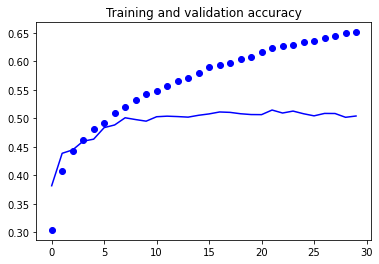

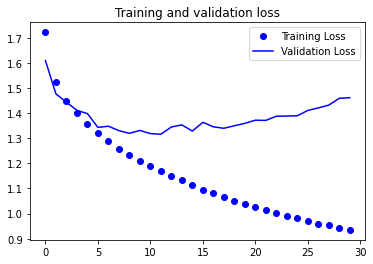

In [12]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [84]:
# Evaluate Model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import random

In [96]:
# Using test generator dataset
Y_pred = model.predict(testgenerator)
y_pred = np.argmax(Y_pred, axis=1)

Labels : {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}
 


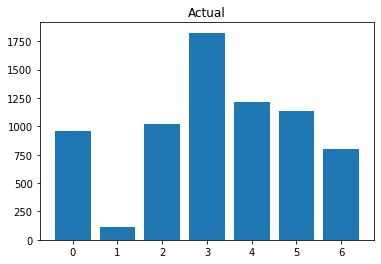

actual : Counter({3: 1825, 4: 1216, 5: 1139, 2: 1018, 0: 960, 6: 797, 1: 111})



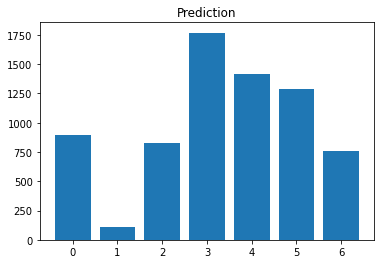

prediction : Counter({3: 1769, 4: 1416, 5: 1288, 0: 897, 2: 829, 6: 759, 1: 108})


In [94]:
labels={0:'angry',1:'disgust',2:'fear',3:'happy',4:'neutral',5:'sad',6:'surprise'}
print('Labels :', labels)
print(' ')
actual = collections.Counter(testgenerator.classes)
prediction = collections.Counter(y_pred)

plt.bar(actual.keys(), actual.values())
plt.title('Actual')
plt.show()

print('actual :', collections.Counter(testgenerator.classes))
print("")
plt.figure()
plt.bar(prediction.keys(), prediction.values())
plt.title('Prediction')
plt.show()

print('prediction :', collections.Counter(y_pred))

In [97]:
# Plot Random N Missclassified Images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

tes1 = testgenerator.classes
tes2 = y_pred
diff = tes1-tes2


fear/15001.jpg / actual:  2 / prediction:  4


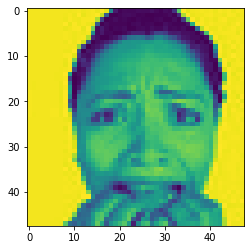

angry/33459.jpg / actual:  0 / prediction:  4


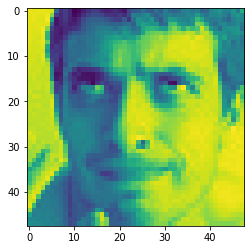

neutral/15686.jpg / actual:  4 / prediction:  3


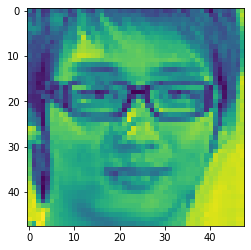

fear/1873.jpg / actual:  2 / prediction:  6


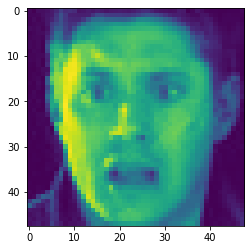

happy/24692.jpg / actual:  3 / prediction:  4


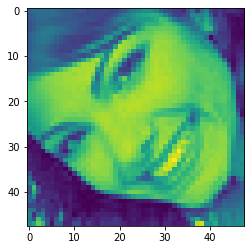

In [101]:
#Initiatialize
x=[]
y=0

#Calculate False Prediction Location (x)
for i in range(len(diff)):
  if diff[i]>0 or diff[i]<0:
    x.append(i)
  y+=1

#Print N Random Misclassified Images (limit==N)
limit=0
dir = ('/tmp/dataset/images/images/validation')
while True:
  limit+=1
  nomor = random.sample(x,1)
  print(testgenerator.filenames[(nomor[0])],'/ actual: ', tes1[(nomor[0])], '/ prediction: ', tes2[(nomor[0])])
  plt.imshow(mpimg.imread(dir+'/'+testgenerator.filenames[(nomor[0])]))
  plt.show()

  if limit == 5:
    break

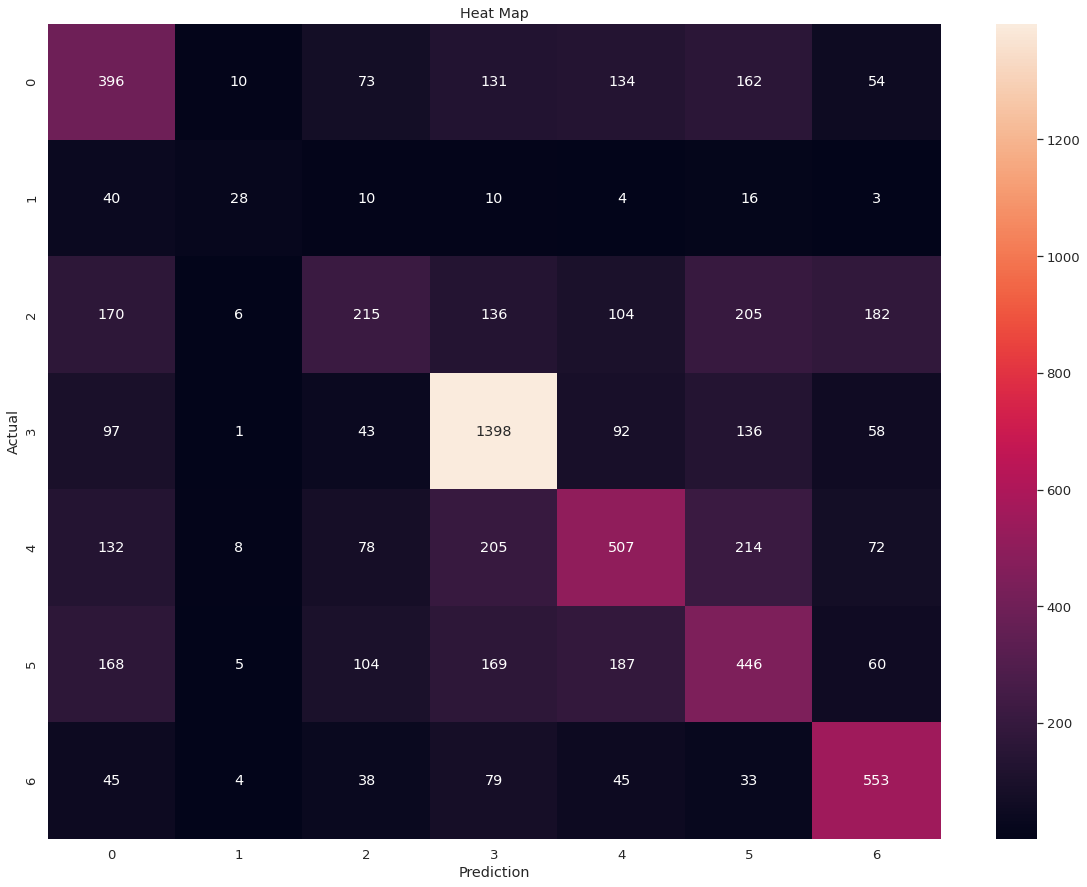

In [215]:
import seaborn as sn
import pandas as pd

array= confusion_matrix(testgenerator.classes,y_pred)

plt.subplots(figsize=(20,15))
df_cm=pd.DataFrame(array, range(7),range(7))
sn.set(font_scale=1.2)
sn.heatmap(df_cm, annot=True, fmt='g')
plt.title('Heat Map')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [212]:
# Classification Report

target_names = ['angry','disgust','fear','happy','neutral','sad','surprise']
print(classification_report(testgenerator.classes, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       angry       0.38      0.41      0.39       960
     disgust       0.45      0.25      0.32       111
        fear       0.38      0.21      0.27      1018
       happy       0.66      0.77      0.71      1825
     neutral       0.47      0.42      0.44      1216
         sad       0.37      0.39      0.38      1139
    surprise       0.56      0.69      0.62       797

    accuracy                           0.50      7066
   macro avg       0.47      0.45      0.45      7066
weighted avg       0.49      0.50      0.49      7066



In [188]:
#tf.keras.backend.clear_session()
#del history

NameError: ignored